In [59]:
import os
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import Image
from tensorflow.keras.datasets import mnist
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [4]:
xy = []
cat_path = os.listdir('./input/CatsAndDogs/cat')
dog_path = os.listdir('./input/CatsAndDogs/dog')

for cat in cat_path:
    img = cv2.imread(f'./input/CatsAndDogs/cat/{cat}')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    xy.append([img, 0])
for dog in dog_path:
    img = cv2.imread(f'./input/CatsAndDogs/dog/{dog}')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    xy.append([img, 1])

In [6]:
np.random.shuffle(xy)

In [7]:
X = [x[0] for x in xy]
y = [x[1] for x in xy]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
np.shape(X_train)

(800, 512, 512, 3)

In [60]:
def show10_image(images):
    plt.figure(figsize=(12,8))
    rnd_indices = np.random.randint(0,len(images),10)
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[rnd_indices[i]])
        plt.axis('off')

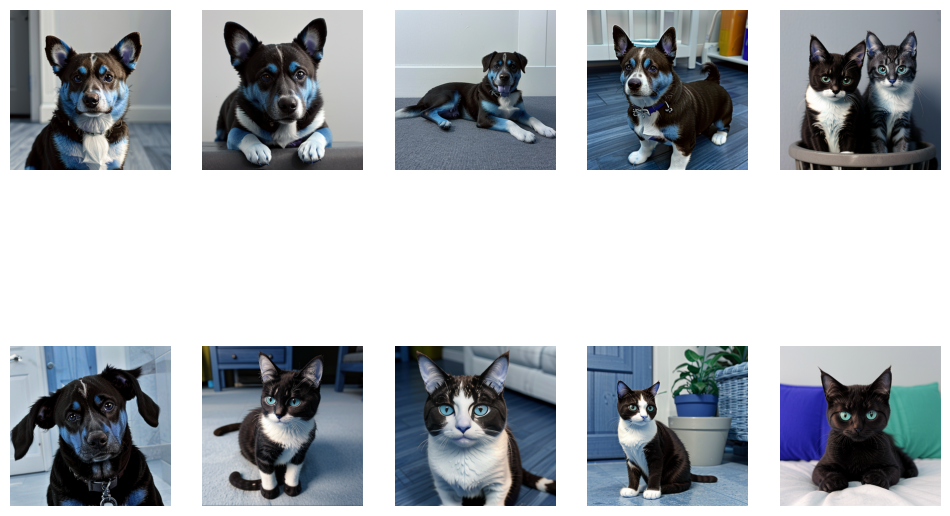

In [61]:
show10_image(X_train)

In [47]:
model_cnn = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(512, 512, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)
])

model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),#Try other optimizers like  Adagrade , Gradient decent with momentum ,RMSprop for diff accu
    metrics=["accuracy"],
)

# Define early stopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

In [48]:
model_cnn.fit(X_train,y_train,batch_size=64,epochs=10,verbose=2,callbacks=[early_stopping])

Epoch 1/10
13/13 - 31s - 2s/step - accuracy: 0.5125 - loss: 1.6227
Epoch 2/10
13/13 - 32s - 2s/step - accuracy: 0.6525 - loss: 0.5981
Epoch 3/10
13/13 - 31s - 2s/step - accuracy: 0.7825 - loss: 0.4320
Epoch 4/10
13/13 - 30s - 2s/step - accuracy: 0.8750 - loss: 0.3166
Epoch 5/10
13/13 - 30s - 2s/step - accuracy: 0.9362 - loss: 0.2148
Epoch 6/10
13/13 - 30s - 2s/step - accuracy: 0.9800 - loss: 0.1095
Epoch 7/10
13/13 - 30s - 2s/step - accuracy: 0.9925 - loss: 0.0573
Epoch 8/10
13/13 - 30s - 2s/step - accuracy: 0.9987 - loss: 0.0296
Epoch 9/10
13/13 - 30s - 2s/step - accuracy: 0.9987 - loss: 0.0136
Epoch 10/10
13/13 - 31s - 2s/step - accuracy: 1.0000 - loss: 0.0061


In [49]:
model_cnn.evaluate(X_test, y_test, batch_size=32, verbose=2)

7/7 - 2s - 287ms/step - accuracy: 0.9150 - loss: 0.3795


[0.3795159161090851, 0.9150000214576721]

In [54]:
pred_cnn_arr = model_cnn.predict(X_test)
pred_cnn = np.argmax(pred_cnn_arr, axis = 1) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step


In [55]:
print(f"The accuracy score is {accuracy_score(y_test, pred_cnn)*100}%")

The accuracy score is 91.5%


In [56]:
print(classification_report(y_test, pred_cnn))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       107
           1       0.91      0.90      0.91        93

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200



In [53]:
print(confusion_matrix(y_test,pred_cnn))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);  

[[99  8]
 [ 9 84]]
